# 3.2.2 Κατανομές Βαθμών Δικτύων Αναφορών Χρηστών

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 
%load_ext autoreload
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import random
from scipy import stats
import numpy as np
import math

In [3]:
import os
import pickle
import glob
# fildir='/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'
fildir='/home/dell/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'
os.chdir(fildir)
GG= pickle.load( open( "GGm.p", "rb" ) )

# lww=[]

k=1
for ww in sorted(GG.keys()):
    print "The number %i cut mention network has %i nodes and %i edges" %(k,len(GG[ww].nodes()),len(GG[ww].edges()))
    k=k+1
# print lww,len(lww)

The number 1 cut mention network has 23868 nodes and 22304 edges
The number 2 cut mention network has 2358 nodes and 2278 edges
The number 3 cut mention network has 720 nodes and 613 edges
The number 4 cut mention network has 351 nodes and 261 edges
The number 5 cut mention network has 206 nodes and 131 edges
The number 6 cut mention network has 113 nodes and 74 edges
The number 7 cut mention network has 78 nodes and 49 edges
The number 8 cut mention network has 50 nodes and 30 edges
The number 9 cut mention network has 37 nodes and 22 edges
The number 10 cut mention network has 28 nodes and 15 edges
The number 11 cut mention network has 23 nodes and 12 edges
The number 12 cut mention network has 19 nodes and 10 edges
The number 13 cut mention network has 16 nodes and 8 edges
The number 14 cut mention network has 12 nodes and 6 edges
The number 15 cut mention network has 10 nodes and 5 edges
The number 16 cut mention network has 8 nodes and 4 edges
The number 17 cut mention network has

In [4]:
ddg=[]
# for i in range(len(GG)-1):
sor=sorted(GG)
for ij in range(len(sor)-1):
    i=sor[ij]
    
    j=sor[ij+1]
    if GG[i].nodes()==GG[j].nodes() and GG[i].edges()==GG[j].edges():
        print i,j
        ddg.append(i)  
print ddg,len(ddg)

[] 0


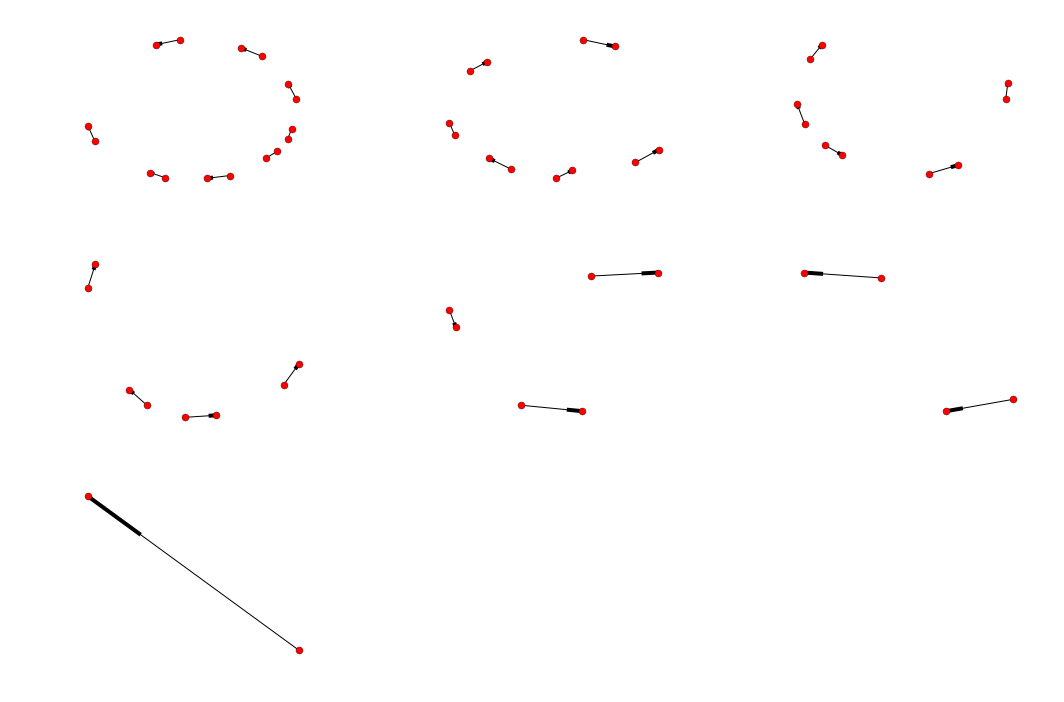

In [4]:
lgraph=[GG[13],GG[14],GG[15],GG[16],GG[44],GG[49],GG[50]]

fig = plt.figure(figsize=(18, 16))

for i in range(1,len(lgraph)+1):
    ax1 = fig.add_subplot(4,3,i)
    nx.draw(lgraph[i-1],node_size=50)

In [5]:
lscc=[]
lsccl=[]
for k,G in GG.items():
    
    degree_sequence=sorted([d for n,d in G.degree().items()], reverse=True) # degree sequence
    degree_sequence_l=sorted([math.log(d) for n,d in G.degree().items()], reverse=True)
    degreeCount=collections.Counter(degree_sequence)
    degreeCount_l=collections.Counter(degree_sequence_l)
    deg, cnt = zip(*degreeCount.items())
    deg_l, cnt_l = zip(*degreeCount_l.items())
    

    slope, intercept, r_value, p_value, std_err = stats.linregress(cnt,deg)
#     print slope #, intercept, r_value, p_value, std_err

    if np.isnan(slope):
        slope=0
    lscc.append(slope)
    slope, intercept, r_value, p_value, std_err = stats.linregress(cnt_l,deg_l)
    if np.isnan(slope):
        slope=0
    lsccl.append(slope)
    
print lscc,len(lscc)
print lsccl,len(lsccl)
nGG=[]
for k,i in GG.items():
    nGG.append(i.name)
print nGG

[-0.0046585667930784669, -0.015180363122546872, -0.018524692957014963, -0.024339578851379932, -0.01943487833794388, -0.034986568826574069, -0.036153559448378683, -0.057783820530251523, 0, -0.076923076923076927, -0.047619047619047616, -0.058823529411764705, 0, 0, 0, 0, 0, 0, -0.072405929304446989] 19
[-0.00023882773016113823, -0.0020567859419802132, -0.004524100290370277, -0.0074574353216714838, -0.0082802709672750874, -0.015226655230930706, -0.018662230557811958, -0.028979300886768616, 0, -0.042254318794927297, -0.033007008598092635, -0.040773363562349722, 0, 0, 0, 0, 0, 0, -0.036751817441319792] 19
['G_1', 'G_2', 'G_3', 'G_4', 'G_5', 'G_6', 'G_7', 'G_8', 'G_44', 'G_10', 'G_11', 'G_12', 'G_13', 'G_14', 'G_15', 'G_16', 'G_49', 'G_50', 'G_9']


In [6]:
ddd=zip(nGG,lscc,lsccl)
print ddd

[('G_1', -0.0046585667930784669, -0.00023882773016113823), ('G_2', -0.015180363122546872, -0.0020567859419802132), ('G_3', -0.018524692957014963, -0.004524100290370277), ('G_4', -0.024339578851379932, -0.0074574353216714838), ('G_5', -0.01943487833794388, -0.0082802709672750874), ('G_6', -0.034986568826574069, -0.015226655230930706), ('G_7', -0.036153559448378683, -0.018662230557811958), ('G_8', -0.057783820530251523, -0.028979300886768616), ('G_44', 0, 0), ('G_10', -0.076923076923076927, -0.042254318794927297), ('G_11', -0.047619047619047616, -0.033007008598092635), ('G_12', -0.058823529411764705, -0.040773363562349722), ('G_13', 0, 0), ('G_14', 0, 0), ('G_15', 0, 0), ('G_16', 0, 0), ('G_49', 0, 0), ('G_50', 0, 0), ('G_9', -0.072405929304446989, -0.036751817441319792)]


In [7]:
cdf=pd.DataFrame(ddd)
cdf.columns = ['Cut Mention Graph', 'Slope','Logarithmic Slope']
cdf['cut-off values']=GG.keys()
cdf=cdf.sort(['cut-off values'], ascending=[True])
cdf

,Cut Mention Graph,Slope,Logarithmic Slope,cut-off values
0,G_1,-0.004659,-0.000239,1
1,G_2,-0.015180,-0.002057,2
2,G_3,-0.018525,-0.004524,3
3,G_4,-0.024340,-0.007457,4
4,G_5,-0.019435,-0.008280,5
5,G_6,-0.034987,-0.015227,6
6,G_7,-0.036154,-0.018662,7
7,G_8,-0.057784,-0.028979,8
18,G_9,-0.072406,-0.036752,9
9,G_10,-0.076923,-0.042254,10


In [8]:
cdf.to_pickle("/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df3_2_2")
# cdf.to_pickle("/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes/df3_2_2")

##### The first bin of degrees ( 1 , 5.3 ) has number of nodes 22858 and the second one (5.3 , 9.6 ) has 398 nodes.
##### We have 85 bins.

(0, 125)

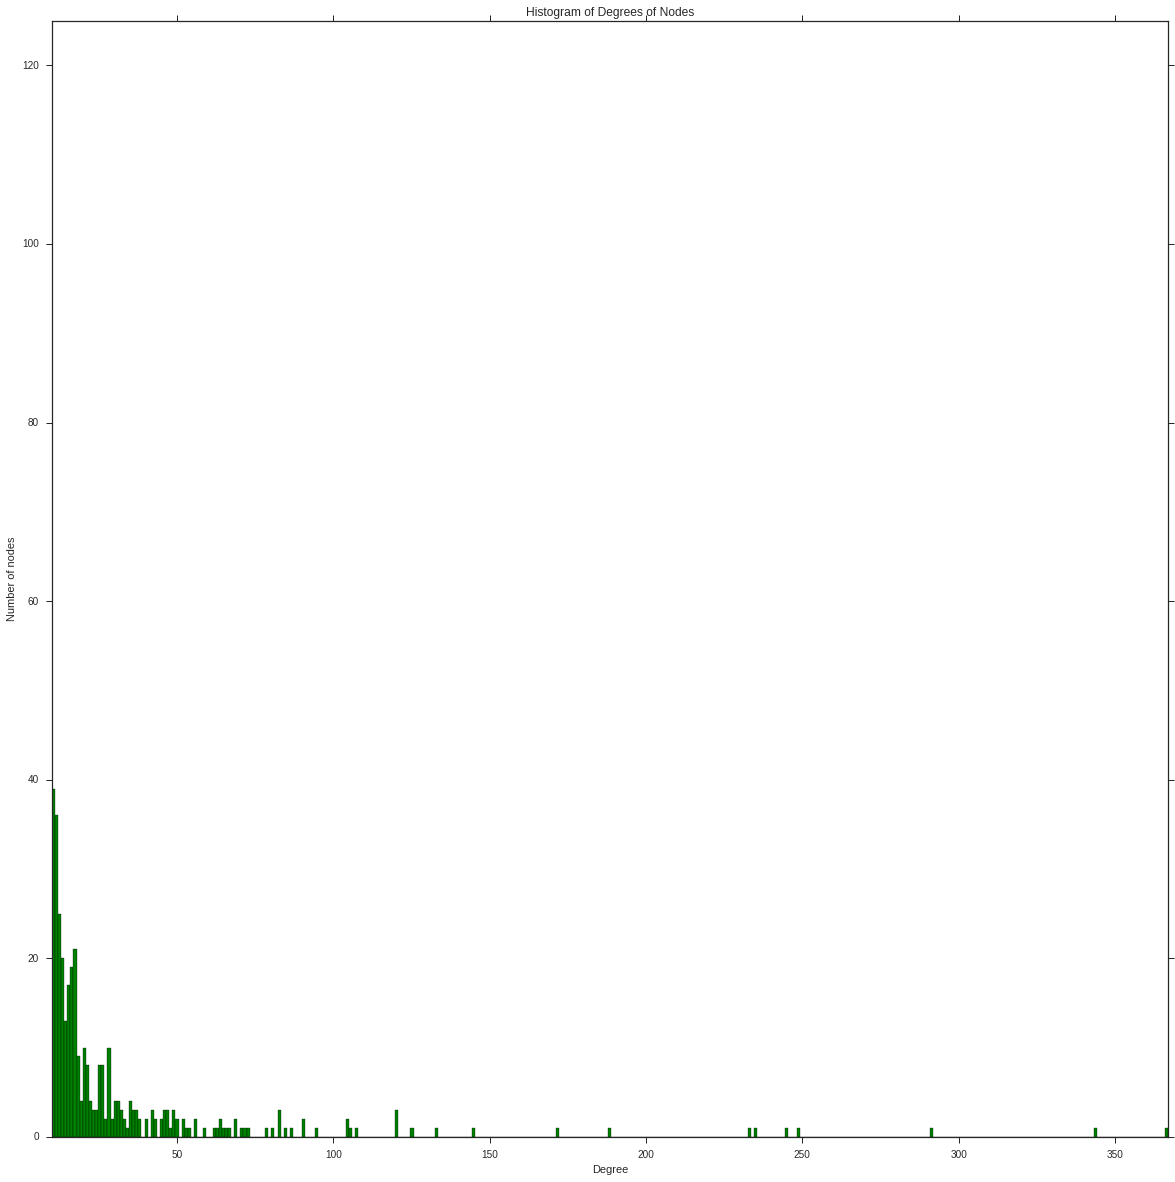

In [48]:
from pylab import hist

G=GG[1] 
deg = G.degree()

plt.figure(figsize=(20,20))
plt.xlabel("Degree")


hist(deg.values(),bins=370,color='g')

plt.ylabel("Number of nodes")
plt.title('Histogram of Degrees of Nodes')

plt.xlim(10,367) #367
plt.ylim(0,125) 



In [46]:
ds=list(sorted([d for n,d in G.degree().items()], reverse=True)) # degree sequence
c=0
for i in ds:
    if (i>5.3 and i<9.6): #55
        c=c+1
print c

398


In [33]:
ds=list(sorted([d for n,d in G.degree().items()], reverse=True)) # degree sequence
c=0
for i in ds:
    if i>370: #55
        c=c+1
print c
print len(set(G.degree().values()))
max(ds)

0
85


367

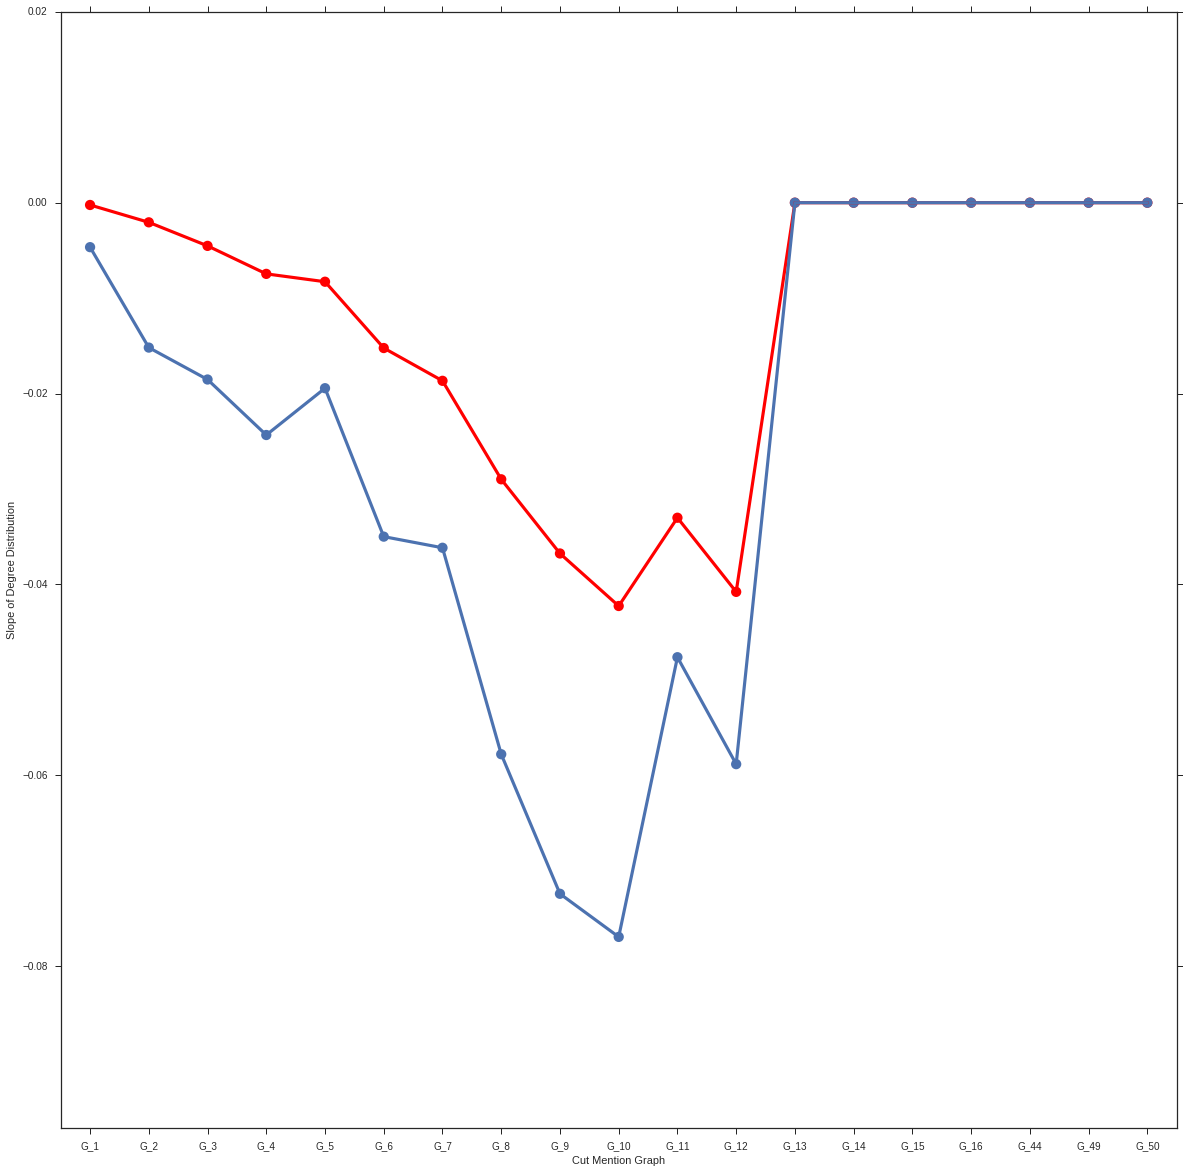

In [13]:
x = cdf["Cut Mention Graph"]
y = cdf["Logarithmic Slope"]
z=cdf["Slope"]
plt.figure(figsize=(20,20))

ax1=sns.pointplot(x, y,color='red')
ax2=sns.pointplot(x, z)
a1=ax1.set(xlabel='Cut Mention Graph',ylabel='Slope of Degree Distribution')
a11=ax2.set(xlabel='Cut Mention Graph')
a3=ax1.set(ylim=(min(lscc)-0.02,max(lscc)+0.02))
# s='Logarithmic Scale'
ax1.legend(title="Log",loc=2)

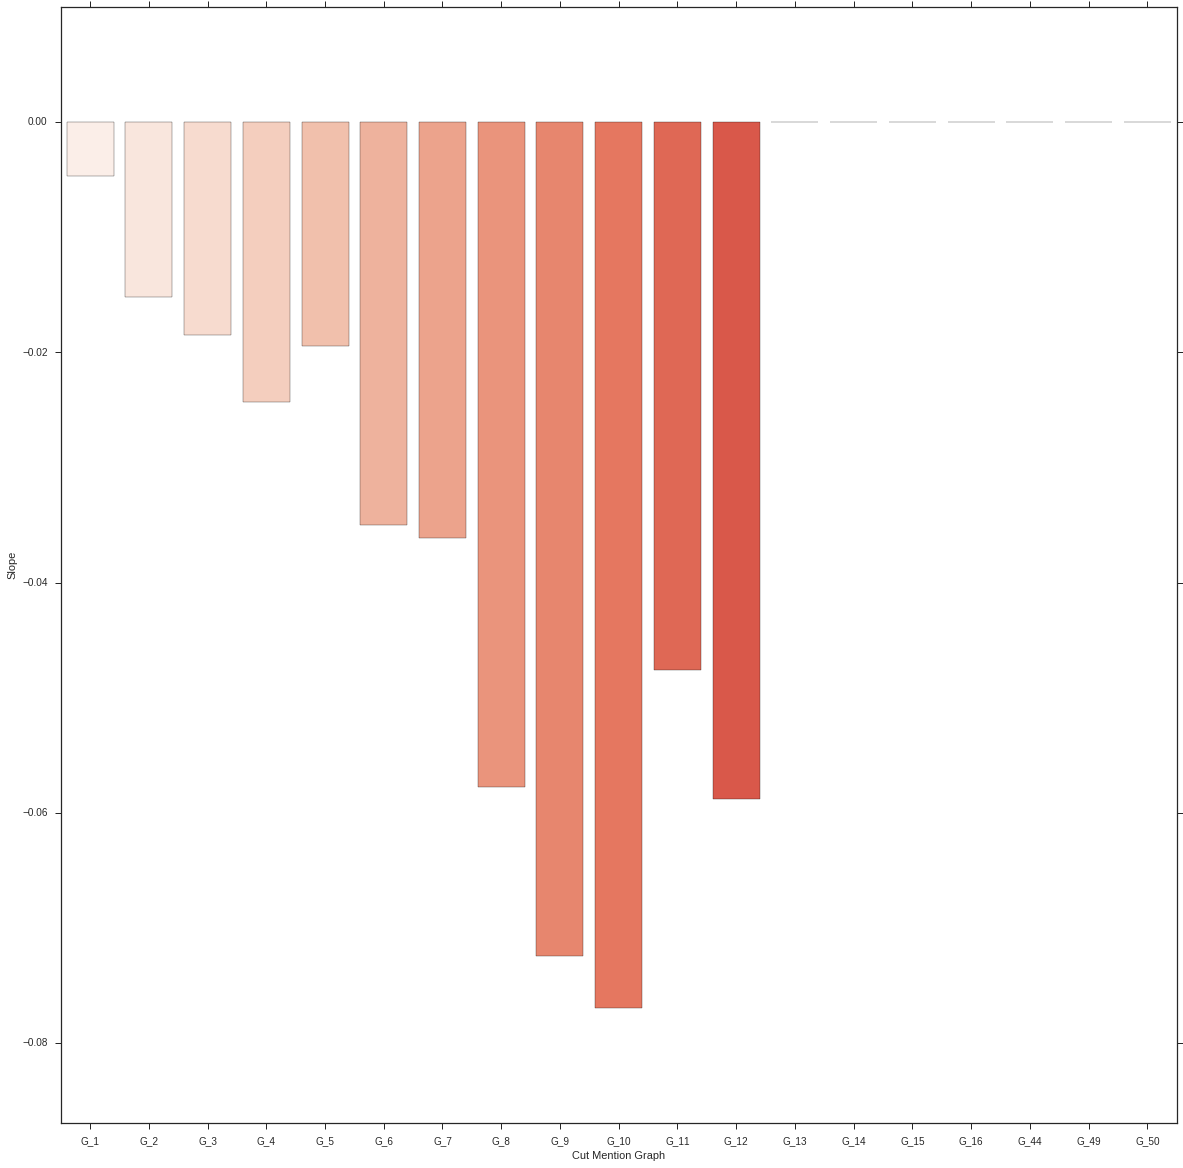

In [15]:
x = cdf["Cut Mention Graph"]
y = cdf["Slope"]
plt.figure(figsize=(20,20))


ax=sns.barplot(x, y,palette='Reds')
a1=ax.set(xlabel='Cut Mention Graph', ylabel='Slope')
a3=ax.set(ylim=(min(lscc)-0.01,max(lscc)+0.01))


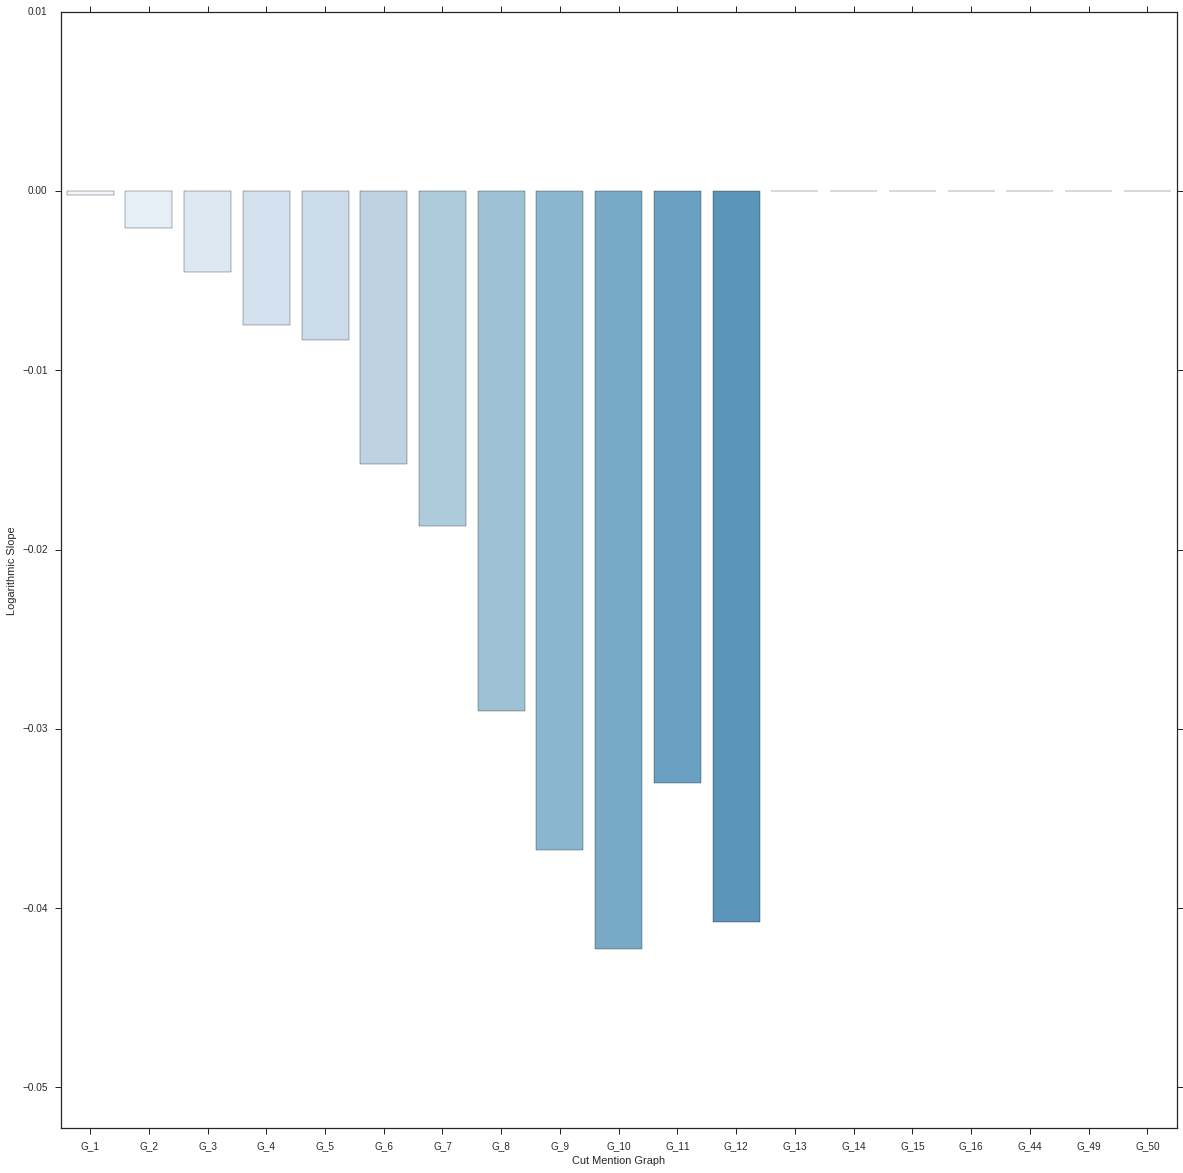

In [16]:
x = cdf["Cut Mention Graph"]
y = cdf["Logarithmic Slope"]
plt.figure(figsize=(20,20))


ax=sns.barplot(x, y,palette='Blues')
a1=ax.set(xlabel='Cut Mention Graph', ylabel='Logarithmic Slope')
a3=ax.set(ylim=(min(lsccl)-0.0,max(lsccl)+10))
